# To plot figures in the project report

### plot the overfitting issue on CIFAR-100

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time, os, datetime
import PIL
import pandas as pd
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
Cifar100_56  = pd.read_csv('./NoteBooks/CIFAR-100/Models/AttentionResNet56_cifar100_history.csv',index_col=0)
Cifar100_128 = pd.read_csv('./NoteBooks/CIFAR-100/Models/AttentionResNet128_cifar100_history.csv',index_col=0)
Cifar100_92  = pd.read_csv('./NoteBooks/CIFAR-100/Models/AttentionResNet92_cifar100_history.csv',index_col=0)
Cifar100_236 = pd.read_csv('./NoteBooks/CIFAR-100/Models/AttentionResNet236_cifar100_history.csv',index_col=0)


Cifar10_56  = pd.read_csv('./NoteBooks/CIFAR-10/Models/AttentionResNet56_cifar10_history.csv',index_col=0)
Cifar10_92  = pd.read_csv('./NoteBooks/CIFAR-10/Models/AttentionResNet92_cifar10_history.csv',index_col=0)
Cifar10_128 = pd.read_csv('./NoteBooks/CIFAR-10/Models/AttentionResNet128_cifar10_history.csv',index_col=0)
Cifar10_236 = pd.read_csv('./NoteBooks/CIFAR-10/Models/AttentionResNet236_cifar10_history.csv',index_col=0)

In [8]:
# set changing colors for different months
Ncolors   = 8
colormap  = plt.cm.Spectral#viridis#
mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
mapcolors.reverse()

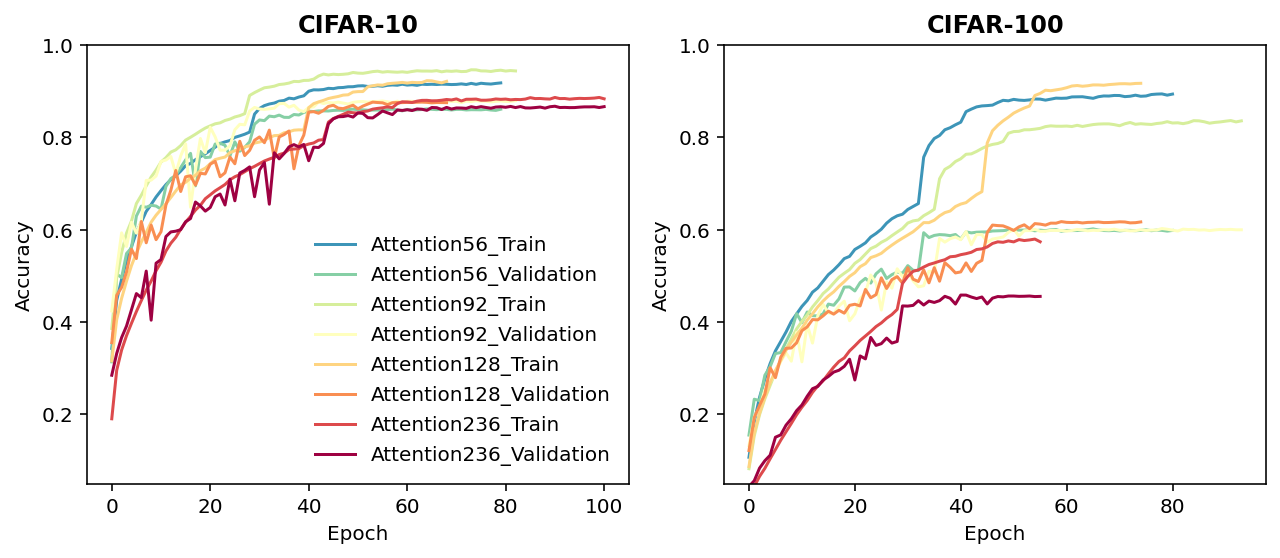

In [11]:
fig, axes = plt.subplots(figsize=(9,4),ncols=2)

axes[0].plot(Cifar10_56.index, Cifar10_56.accuracy, color=mapcolors[0],label='Attention56_Train')
axes[0].plot(Cifar10_56.index, Cifar10_56.val_accuracy,color=mapcolors[1], label='Attention56_Validation')
axes[0].plot(Cifar10_92.index, Cifar10_92.accuracy, color=mapcolors[2],label='Attention92_Train')
axes[0].plot(Cifar10_92.index, Cifar10_92.val_accuracy,color=mapcolors[3], label='Attention92_Validation')
axes[0].plot(Cifar10_128.index, Cifar10_128.accuracy,color=mapcolors[4], label='Attention128_Train')
axes[0].plot(Cifar10_128.index, Cifar10_128.val_accuracy, color=mapcolors[5],label='Attention128_Validation')
axes[0].plot(Cifar10_236.index, Cifar10_236.accuracy, color=mapcolors[6],label='Attention236_Train')
axes[0].plot(Cifar10_236.index, Cifar10_236.val_accuracy,color=mapcolors[7], label='Attention236_Validation')



axes[0].set_title('CIFAR-10',fontweight='bold')
axes[0].legend(loc='lower right',frameon=False)

axes[1].plot(Cifar100_56.index, Cifar100_56.accuracy, color=mapcolors[0],label='Attention56_Train')
axes[1].plot(Cifar100_56.index, Cifar100_56.val_accuracy,color=mapcolors[1], label='Attention56_Validation')
axes[1].plot(Cifar100_92.index, Cifar100_92.accuracy, color=mapcolors[2],label='Attention92_Train')
axes[1].plot(Cifar100_92.index, Cifar100_92.val_accuracy,color=mapcolors[3], label='Attention92_Validation')
axes[1].plot(Cifar100_128.index, Cifar100_128.accuracy,color=mapcolors[4], label='Attention128_Train')
axes[1].plot(Cifar100_128.index, Cifar100_128.val_accuracy, color=mapcolors[5],label='Attention128_Validation')
axes[1].plot(Cifar100_236.index, Cifar100_236.accuracy, color=mapcolors[6],label='Attention236_Train')
axes[1].plot(Cifar100_236.index, Cifar100_236.val_accuracy,color=mapcolors[7], label='Attention236_Validation')

axes[1].set_title('CIFAR-100',fontweight='bold')
# axes[1].legend(frameon=False)

for ax in axes:
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.set_ylim([0.05,1])
    
plt.tight_layout()
plt.rcParams['savefig.dpi'] = 220
plt.savefig('./Figures/TrainingProcess_cifar10_100.png')

### plot the comparison between our results and the original paper

noise level

In [12]:
N_10 = [5.93, 5.15, 15.65, 18.02]
N_30 = [6.61, 5.79, 24.95, 21.06]
N_50 = [8.35, 7.27, 40.46, 29.18]
N_70 = [17.21,15.75,61.58, 40.68]

labels = ['ResNet-164 \n original paper', 'Attention-92 \n original paper', 
          'ResNet-56 \n our results', 'Attention-56 \n our results']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

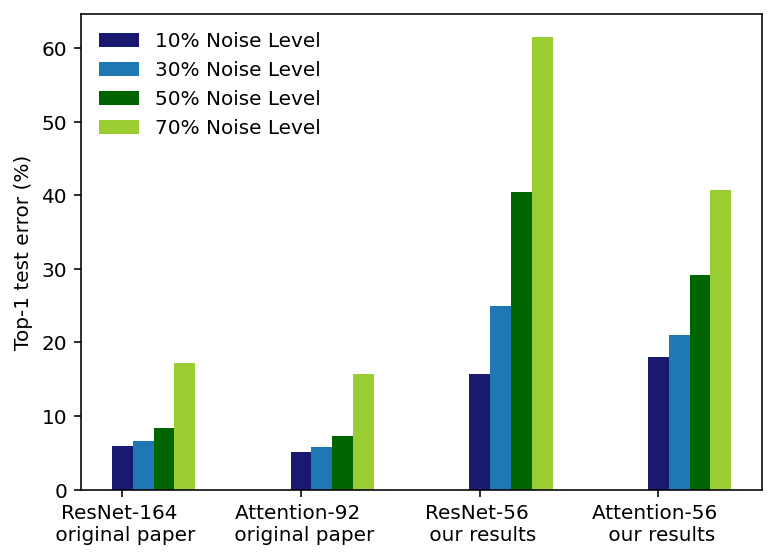

In [13]:
fig, ax = plt.subplots(figsize=(5.5,4))
edge = None

rects1 = ax.bar(x , N_10, width/3, label='10% Noise Level',color='midnightblue',edgecolor=edge)
rects2 = ax.bar(x + width/3, N_30, width/3, label='30% Noise Level',color='tab:blue',edgecolor=edge)
rects3 = ax.bar(x + 2*width/3, N_50, width/3, label='50% Noise Level',color='darkgreen',edgecolor=edge)
rects4 = ax.bar(x + 3*width/3, N_70, width/3, label='70% Noise Level',color='yellowgreen',edgecolor=edge)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Top-1 test error (%)')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(frameon=False)

plt.tight_layout()
plt.rcParams['savefig.dpi'] = 220
# plt.savefig('./Figures/results_compare_Noise_Level.png')

Attention Residual Learning

In [14]:
Original = [5.52, 6.24, 6.33]
Our = [14.43, 17.40, 16.45]

labels = ['Mixed Attention','Channel Attention','Spatial Attention']

x = np.arange(len(labels))  # the label locations

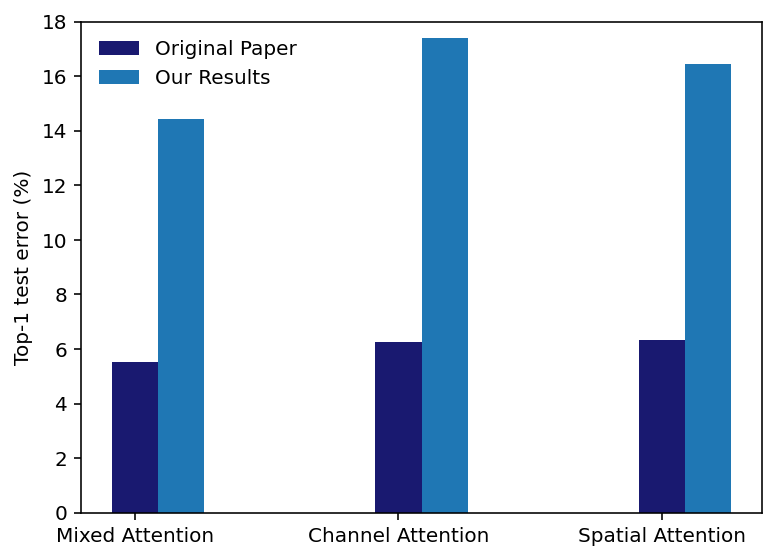

In [15]:
fig, ax = plt.subplots(figsize=(5.5,4))
edge = None

rects1 = ax.bar(x , Original, width/2, label='Original Paper',color='midnightblue',edgecolor=edge)
rects2 = ax.bar(x + width/2, Our, width/2, label='Our Results',color='tab:blue',edgecolor=edge)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Top-1 test error (%)')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(frameon=False)
ax.set_ylim([0,18])

plt.tight_layout()
plt.rcParams['savefig.dpi'] = 220
# plt.savefig('./Figures/results_compare_attention_type.png')

ARL & NAL

In [16]:
A_56 = [5.52, 5.89,14.43,16.15]
A_92 = [4.99, 5.35,12.63,13.18]
A_128 = [4.44,5.57,13.29,14.33]
A_164 = [4.31,7.18,12.02,14.15]

labels = ['ARL \n original paper',
         'NAL \n original paper',
         'ARL \n our results',
         'NAL \n our results']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

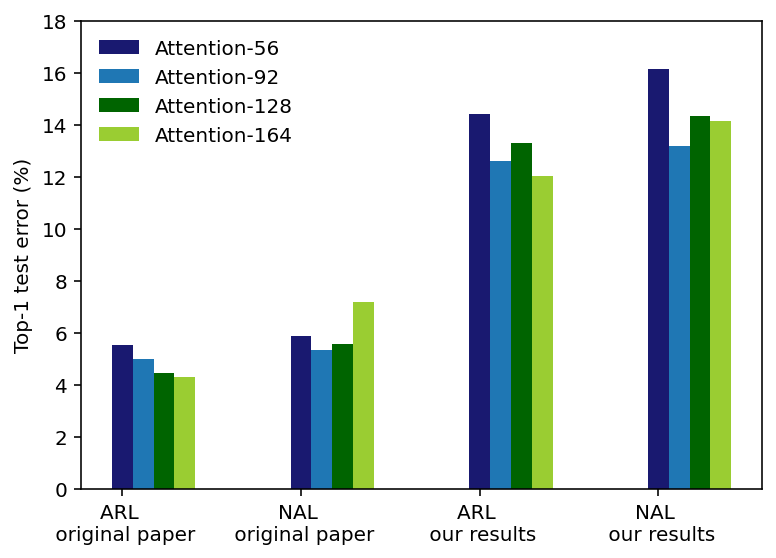

In [17]:
fig, ax = plt.subplots(figsize=(5.5,4))
edge = None

rects1 = ax.bar(x , A_56, width/3, label='Attention-56',color='midnightblue',edgecolor=edge)
rects2 = ax.bar(x + width/3, A_92, width/3, label='Attention-92',color='tab:blue',edgecolor=edge)
rects3 = ax.bar(x + 2*width/3,A_128, width/3, label='Attention-128',color='darkgreen',edgecolor=edge)
rects4 = ax.bar(x + 3*width/3, A_164, width/3, label='Attention-164',color='yellowgreen',edgecolor=edge)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Top-1 test error (%)')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(frameon=False)
ax.set_ylim([0,18])

plt.tight_layout()
plt.rcParams['savefig.dpi'] = 220
# plt.savefig('./Figures/results_compare_ARL_NAL.png')